In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('Mumbai House Prices.csv')
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
df.shape

(76038, 9)

In [4]:
df.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [5]:
df.isna().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [6]:
#Dropping the duplicate rows
df=df.drop_duplicates()
df.describe()

,bhk,area,price
count,55726.000000,55726.000000,55726.000000
mean,1.941930,985.728152,31.124466
std,0.888328,608.996691,33.172304
min,1.000000,127.000000,1.000000
25%,1.000000,645.000000,1.800000
50%,2.000000,854.500000,11.000000
75%,2.000000,1150.000000,60.642500
max,10.000000,16000.000000,99.990000


In [7]:
df.price_unit.unique()

array(['Cr', 'L'], dtype=object)

In [8]:
#Converting all the prices to lakhs
def cnvrt_price_to_lakhs(row):
    return row['price']*100 if row['price_unit']=='Cr' else row['price']
df['price_lakhs']=df.apply(cnvrt_price_to_lakhs, axis=1)

In [9]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age,price_lakhs
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,94.11


In [10]:
# 'price' and 'price_unit' column dropped 
df1=df.drop(['price','price_unit'],axis=1)

In [11]:
df1.head()

,bhk,type,locality,area,region,status,age,price_lakhs
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,94.11


In [12]:
df1.isna().sum()

bhk            0
type           0
locality       0
area           0
region         0
status         0
age            0
price_lakhs    0
dtype: int64

In [13]:
df1.locality.value_counts()

locality
JP North Barcelona                254
Lodha Codename Premier            207
Amar Vinay Heritage               196
Raj Akshay                        193
JP Codename Dream Home Tower B    192
                                 ... 
Ozone The Autograph                 1
Kings Kings Heights I               1
JE Madhuban                         1
Swaraj Homes Vaibhav Building       1
Hubtown Serene                      1
Name: count, Length: 9782, dtype: int64

<Axes: ylabel='locality'>

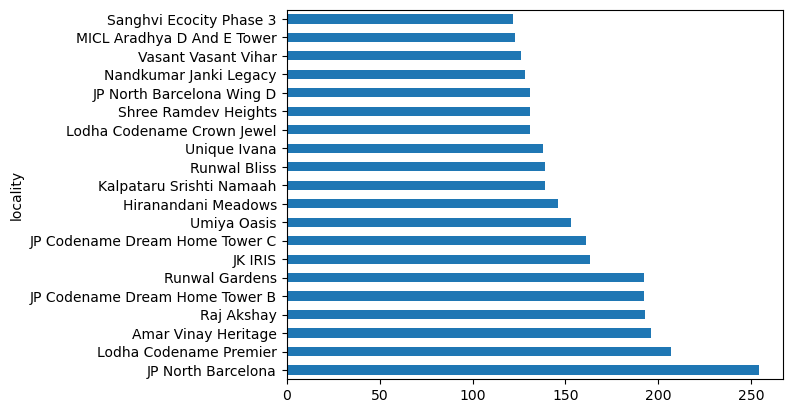

In [14]:
#Handling the localities
locality_counts=df1['locality'].value_counts()
locality_counts.head(20).plot(kind='barh')

In [15]:
#Filtering the localities with more than 40 properties
df2= df1[df1['locality'].map(locality_counts)>40]

In [16]:
#Assigning each locality to the average price
locality_avrg_price = df2.groupby('locality')['price_lakhs'].mean()
df2['locality_avrg_price']=df2['locality'].map(locality_avrg_price)
locality_list=df2['locality'].value_counts().index.tolist()
locality_list

/var/folders/nk/k30kb7y168s_pnry0sxwfp2m0000gn/T/ipykernel_2405/2257330044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['locality_avrg_price']=df2['locality'].map(locality_avrg_price)


['JP North Barcelona',
 'Lodha Codename Premier',
 'Amar Vinay Heritage',
 'Raj Akshay',
 'Runwal Gardens',
 'JP Codename Dream Home Tower B',
 'JK IRIS',
 'JP Codename Dream Home Tower C',
 'Umiya Oasis',
 'Hiranandani Meadows',
 'Kalpataru Srishti Namaah',
 'Runwal Bliss',
 'Unique Ivana',
 'Lodha Codename Crown Jewel',
 'Shree Ramdev Heights',
 'JP North Barcelona Wing D',
 'Nandkumar Janki Legacy',
 'Vasant Vasant Vihar',
 'MICL Aradhya D And E Tower',
 'Sanghvi Ecocity Phase 3',
 'Raj Heritage',
 'Runwal My City',
 'Lodha Palava Lakeshore Greens',
 'JP North Phase 6 Alexa',
 'SKD Pinnacolo NX',
 'Kanakia Zenworld Phase I',
 'RNA NG Ocean Pearl',
 'Raj Heritage 2',
 'Lodha Sterling',
 'JP Codename HOTCAKE',
 'JP North Celeste',
 'Paradise Sai World Empire',
 'Techno Vision Vivanta Marvel',
 'Ajmera Bhakti Park',
 'Wadhwa Atmosphere O2',
 'JP North',
 'Hiranandani One Hiranandani Park',
 'JP JP North Phase 5 Euphoria',
 'Dosti West County',
 'Hiranandani Fortune City',
 'DB Ozone',


In [17]:
#Dropped 'locality' column
df2.drop(['locality'],axis=1,inplace=True)
df2.head()

/var/folders/nk/k30kb7y168s_pnry0sxwfp2m0000gn/T/ipykernel_2405/3857730606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['locality'],axis=1,inplace=True)


,bhk,type,area,region,status,age,price_lakhs,locality_avrg_price
16,1,Apartment,450,Powai,Under Construction,New,139.0,218.000000
38,3,Apartment,1116,Mulund West,Under Construction,New,285.0,167.361000
86,3,Apartment,1056,Mulund West,Under Construction,New,245.0,167.361000
197,1,Apartment,431,Powai,Under Construction,New,135.0,218.000000
313,1,Apartment,720,Dombivali,Under Construction,Resale,47.0,82.401111


In [18]:
#Dropped the region because of locality_avrg_price 
df2.drop(['region'], axis=1, inplace=True)      

/var/folders/nk/k30kb7y168s_pnry0sxwfp2m0000gn/T/ipykernel_2405/2210226181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['region'], axis=1, inplace=True)


In [19]:
df2.type.unique()

array(['Apartment', 'Studio Apartment', 'Villa', 'Independent House',
       'Penthouse'], dtype=object)

In [20]:
#Set dummies for 'type'
type_list = df2.type.unique().tolist()
df3= pd.get_dummies(df2,columns=['type'])
type_dummy_cols= [col for col in df3.columns if col.startswith('type_')]
df3.head()

,bhk,area,status,age,price_lakhs,locality_avrg_price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa
16,1,450,Under Construction,New,139.0,218.000000,True,False,False,False,False
38,3,1116,Under Construction,New,285.0,167.361000,True,False,False,False,False
86,3,1056,Under Construction,New,245.0,167.361000,True,False,False,False,False
197,1,431,Under Construction,New,135.0,218.000000,True,False,False,False,False
313,1,720,Under Construction,Resale,47.0,82.401111,True,False,False,False,False


In [21]:
df.status.unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [22]:
#Set dummies for 'status'
status_list=df3.status.unique().tolist()
df4= pd.get_dummies(df3, columns=['status'])
status_dummy_cols=[col for col in df4.columns if col.startswith('status_')]
df4.head()

,bhk,area,age,price_lakhs,locality_avrg_price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction
16,1,450,New,139.0,218.000000,True,False,False,False,False,False,True
38,3,1116,New,285.0,167.361000,True,False,False,False,False,False,True
86,3,1056,New,245.0,167.361000,True,False,False,False,False,False,True
197,1,431,New,135.0,218.000000,True,False,False,False,False,False,True
313,1,720,Resale,47.0,82.401111,True,False,False,False,False,False,True


In [23]:
df4.age.unique()

array(['New', 'Resale', 'Unknown'], dtype=object)

In [24]:
#Set dummies for 'age'
age_list= df4.age.unique().tolist()
df5= pd.get_dummies(df4, columns=['age'])
age_dummy_cols= [col for col in df5.columns if col.startswith('age_')]
df5.head()

,bhk,area,price_lakhs,locality_avrg_price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
16,1,450,139.0,218.000000,True,False,False,False,False,False,True,True,False,False
38,3,1116,285.0,167.361000,True,False,False,False,False,False,True,True,False,False
86,3,1056,245.0,167.361000,True,False,False,False,False,False,True,True,False,False
197,1,431,135.0,218.000000,True,False,False,False,False,False,True,True,False,False
313,1,720,47.0,82.401111,True,False,False,False,False,False,True,False,True,False


In [25]:
df5.isna().sum()

bhk                          0
area                         0
price_lakhs                  0
locality_avrg_price          0
type_Apartment               0
type_Independent House       0
type_Penthouse               0
type_Studio Apartment        0
type_Villa                   0
status_Ready to move         0
status_Under Construction    0
age_New                      0
age_Resale                   0
age_Unknown                  0
dtype: int64

In [26]:
df5.shape

(14074, 14)

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14074 entries, 16 to 76026
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bhk                        14074 non-null  int64  
 1   area                       14074 non-null  int64  
 2   price_lakhs                14074 non-null  float64
 3   locality_avrg_price        14074 non-null  float64
 4   type_Apartment             14074 non-null  bool   
 5   type_Independent House     14074 non-null  bool   
 6   type_Penthouse             14074 non-null  bool   
 7   type_Studio Apartment      14074 non-null  bool   
 8   type_Villa                 14074 non-null  bool   
 9   status_Ready to move       14074 non-null  bool   
 10  status_Under Construction  14074 non-null  bool   
 11  age_New                    14074 non-null  bool   
 12  age_Resale                 14074 non-null  bool   
 13  age_Unknown                14074 non-null  bool   

In [28]:
df5.describe()

,bhk,area,price_lakhs,locality_avrg_price
count,14074.000000,14074.000000,14074.000000,14074.000000
mean,1.919142,969.866420,132.179342,132.179342
std,0.844391,487.429713,120.631465,100.301737
min,1.000000,127.000000,12.000000,19.313590
25%,1.000000,680.000000,64.800000,73.848768
50%,2.000000,870.000000,93.000000,88.963089
75%,2.000000,1100.000000,159.000000,167.086200
max,8.000000,7500.000000,1500.000000,784.076923


In [29]:
x= df5.drop('price_lakhs', axis=1)  
y= df5['price_lakhs']

In [30]:
#Split the data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=11)

In [31]:
#Train model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred= model.predict(x_test)

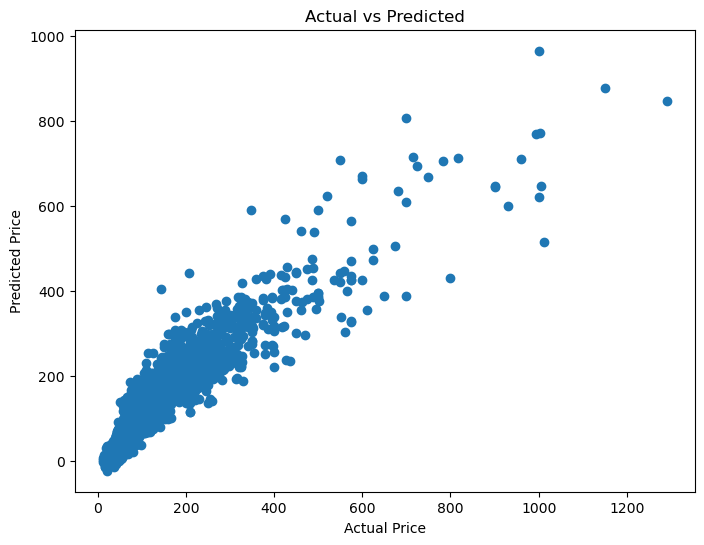

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, model.predict(x_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

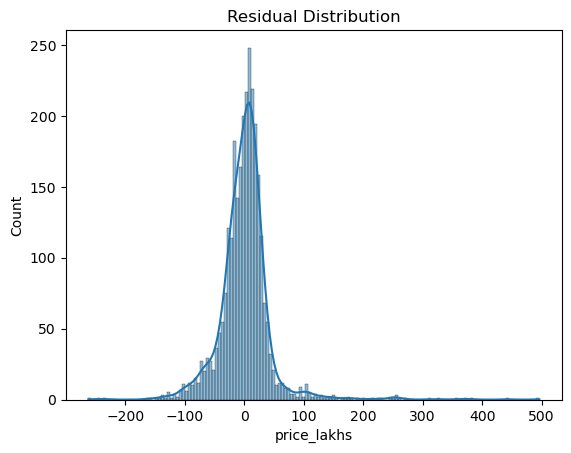

In [34]:
# Residuals
residuals = y_test - model.predict(x_test)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [35]:
intercept= model.intercept_
coefs= model.coef_
intercept, coefs

(-7.09141758046124,
 array([ 2.18334532e+01,  8.08407101e-02,  7.20924125e-01, -8.16010465e+01,
         1.96180516e+01,  1.37111507e+01, -6.12783383e+01,  1.09550183e+02,
        -3.38751306e+00,  3.38751306e+00,  8.03632029e+00,  4.45010158e+00,
        -1.24864219e+01]))

In [36]:
#Input from user
user_data= pd.DataFrame(columns= df5.drop('price_lakhs',axis=1).columns)


In [37]:
#BHk input
user_data.loc[0,'bhk']= int(input("Enter the number of BHKs(eg: 1,2,3,...):"))


In [38]:
#Area input 
user_data.loc[0,'area']= int(input("Enter the area: "))

In [39]:
#status input
print("Select the property status:")
for i, sts in enumerate(status_list):
    print(f"{i+1}. {sts}")

choice1 = int(input("Enter your choice: "))
status = status_list[choice1 - 1]

Select the property status:
1. Under Construction
2. Ready to move


In [40]:
#age input
print("Select the property age:")
for i, age in enumerate(age_list):
    print(f"{i+1}. {age}")

choice2 = int(input("Enter your choice: "))
age = age_list[choice2- 1]

Select the property age:
1. New
2. Resale
3. Unknown


In [41]:
#type input
print("Select the property type:")
for i, opt in enumerate(type_list):
    print(f"{i+1}. {opt}")

choice3 = int(input("Enter your choice: "))
type = type_list[choice3 - 1]

Select the property type:
1. Apartment
2. Studio Apartment
3. Villa
4. Independent House
5. Penthouse


In [42]:
#locality input  
print("Here are the top localities:")
for i, loc in enumerate(locality_list[:20], start=1):
    print(f"{i}. {loc}")
choice4= int(input("Enter your choice: "))
locality= locality_list[choice4-1]

Here are the top localities:
1. JP North Barcelona
2. Lodha Codename Premier
3. Amar Vinay Heritage
4. Raj Akshay
5. Runwal Gardens
6. JP Codename Dream Home Tower B
7. JK IRIS
8. JP Codename Dream Home Tower C
9. Umiya Oasis
10. Hiranandani Meadows
11. Kalpataru Srishti Namaah
12. Runwal Bliss
13. Unique Ivana
14. Lodha Codename Crown Jewel
15. Shree Ramdev Heights
16. JP North Barcelona Wing D
17. Nandkumar Janki Legacy
18. Vasant Vasant Vihar
19. MICL Aradhya D And E Tower
20. Sanghvi Ecocity Phase 3


In [43]:
#Set dummies for the inputs
for s in status_list[:]:  
    user_data.loc[0,f'status_{s}'] = 1 if status == s else 0
for a in age_list[:]: 
    user_data.loc[0,f'age_{a}'] = 1 if age == a else 0
for t in type_list[:]:  
    user_data.loc[0,f'type_{t}'] = 1 if type == t else 0

#Convert locality to locality_avrg_price
user_data.loc[0,'locality_avrg_price'] = locality_avrg_price[locality]

In [44]:
user_vector= np.array([user_data])
#x_train.shape[1],len(coefs),user_data.columns, df5.columns
price= np.dot(user_vector,coefs)+intercept
print(f"The approximated price is: {price} lakhs")

The approximated price is: [[114.88890174585663]] lakhs


In [45]:
from sklearn.metrics import r2_score
print(f"R2 score of the model:{r2_score(y_pred,y_test)}")

R2 score of the model:0.8227840119392281
